# Feature descipition:
* genre: Type of song
* artist_name: Artist name 
* track_name: The name of the song
* track_id: The Spotify ID for the track.
* popularity: Popularity percentage of the song
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms: The duration of the track in milliseconds.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<font size="3.5">Firstly I will import pandas, numpy, seaborn, download dataframe. Also let's see how this dataframe looks like.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, make_scorer, mean_squared_error

df = pd.read_csv('D:\Programming_Projects\ML_Classic_spotify\SpotifyFeatures.csv')
#df=df.drop_duplicates("track_name")
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


<font size="3.5">Let's check types of features, and aslo check if dataframe Nan has data</font>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

<font size="3.5">Dataframe doesn't have any Nan data. Great!

<font size="3.5">Let's checkout if there are any duplicates of tracks.


In [3]:
df.track_id.duplicated().value_counts()


False    176774
True      55951
Name: track_id, dtype: int64

There is 84110 dublicated tracks. A big number to give us wrong statistics. 
Let's find out what the reason:

In [4]:
df[df.track_id.duplicated()].head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599


In [5]:
df[df["artist_name"]=="Radiohead"].sort_values(by="track_name")

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
103174,Children’s Music,Radiohead,(Nice Dream),4QbQ55kHcRNho6XLaPctT1,54,0.1610,0.262,233227,0.567,0.263,A,0.2250,-11.075,Major,0.0344,172.857,3/4,0.377
12030,Alternative,Radiohead,(Nice Dream),4QbQ55kHcRNho6XLaPctT1,51,0.1610,0.262,233227,0.567,0.263,A,0.2250,-11.075,Major,0.0344,172.857,3/4,0.377
96432,Indie,Radiohead,15 Step,6dsq7Nt5mIFzvm5kIYNORy,62,0.0489,0.600,237293,0.853,0.346,C#,0.0934,-7.584,Major,0.0423,94.457,4/4,0.847
97480,Children’s Music,Radiohead,15 Step,6dsq7Nt5mIFzvm5kIYNORy,61,0.0489,0.600,237293,0.853,0.346,C#,0.0934,-7.584,Major,0.0423,94.457,4/4,0.847
4881,Alternative,Radiohead,15 Step,6dsq7Nt5mIFzvm5kIYNORy,58,0.0489,0.600,237293,0.853,0.346,C#,0.0934,-7.584,Major,0.0423,94.457,4/4,0.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,Alternative,Radiohead,Weird Fishes/ Arpeggi,4Iyo50UoYhuuYORMLrGDci,63,0.7740,0.538,318187,0.610,0.749,B,0.0909,-8.027,Minor,0.0392,152.999,4/4,0.199
145112,Indie,Radiohead,You And Whose Army?,6UFvGJalSngqprmUJd59Eo,57,0.7940,0.295,191000,0.150,0.208,C#,0.1030,-10.243,Minor,0.0325,137.393,4/4,0.131
101954,Children’s Music,Radiohead,You And Whose Army?,6UFvGJalSngqprmUJd59Eo,56,0.7940,0.295,191000,0.150,0.208,C#,0.1030,-10.243,Minor,0.0325,137.393,4/4,0.131
156323,Rock,Radiohead,You And Whose Army?,6UFvGJalSngqprmUJd59Eo,57,0.7940,0.295,191000,0.150,0.208,C#,0.1030,-10.243,Minor,0.0325,137.393,4/4,0.131


#### After investigation, we can see the reason for duplicates is that songs can be related to multiple genres at the same time. Let's make separate column with boolean values for every genre. So, if the same song has duplicates with 2 genres (e.g. Rap and Pop), than the columns "Rap" and "Pop" will have value 1 and all other genre columns - 0.

In [6]:
df.loc[df['genre'] == "Children\'s Music", 'genre'] = 'Children’s Music'
pd.options.display.max_columns = None
genres = df.genre.unique()
encoded_df = df.copy()
for genre in genres: 
    encoded_df[genre] = 0

track_id_df = encoded_df.set_index("track_id")


for genre in genres:
    track_id_df.loc[track_id_df.genre.isin([genre]), genre] = 1
  
track_id_df = track_id_df[~track_id_df.index.duplicated(keep='first')] 
track_id_df = track_id_df.drop('genre', axis=1)
print("Not dublicated:",(track_id_df.index.duplicated(keep='first')==0).sum())
print("Dublicated:",(track_id_df.index.duplicated(keep='first')==1).sum())
track_id_df.head(10)

Not dublicated: 176774
Dublicated: 0


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children’s Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0BRjO6ga9RKCKjfDqeFgWV,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0BjC1NfoEOOusryehmNudP,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0CoSDzoNIKCRs124s9uTVy,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0Gc6TVm52BwZD07Ki6tIvf,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0IuslXpMROHdEPvSl1fTQK,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0Mf1jKa8eNAf1a4PwTbizj,Henri Salvador,Le petit souper aux chandelles,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0NUiKYRd6jt1LKMYGkUdnZ,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0PbIF9YVD505GutwotpB5C,Laura Mayne,Let Me Let Go,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0ST6uPfvaPpJLtQwhE6KfC,Chorus,Helka,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


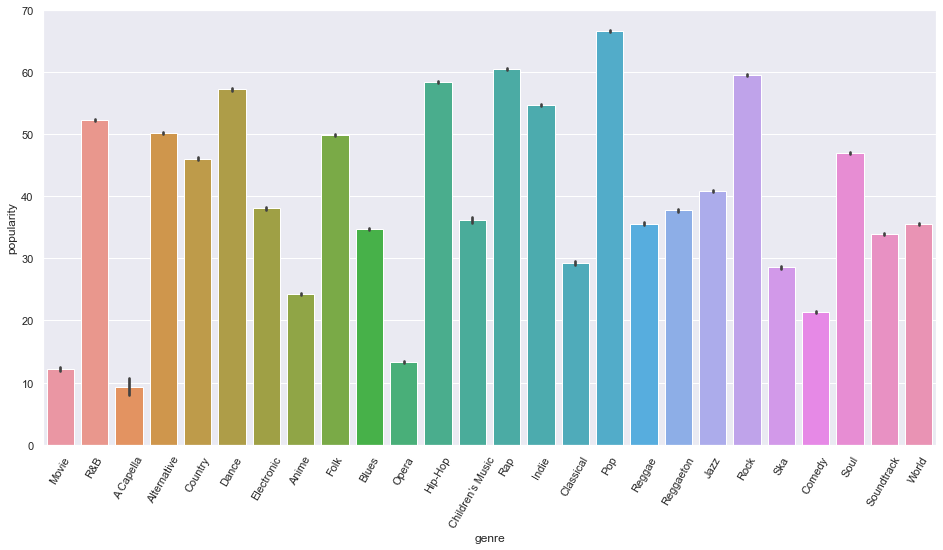

In [7]:
sns.set(rc={'figure.figsize':(16,8)})
bp=sns.barplot(x="genre", y="popularity", data=df)

for item in bp.get_xticklabels():
    item.set_rotation(60)
    

<font size="3.5">Now let's build a correlation matrix and a heatmap for it so we can understand what features affect on popularity. I will exlude dublicates and don't care about genres as long as i will wotk with other features. We will get back to genres later.

<AxesSubplot:>

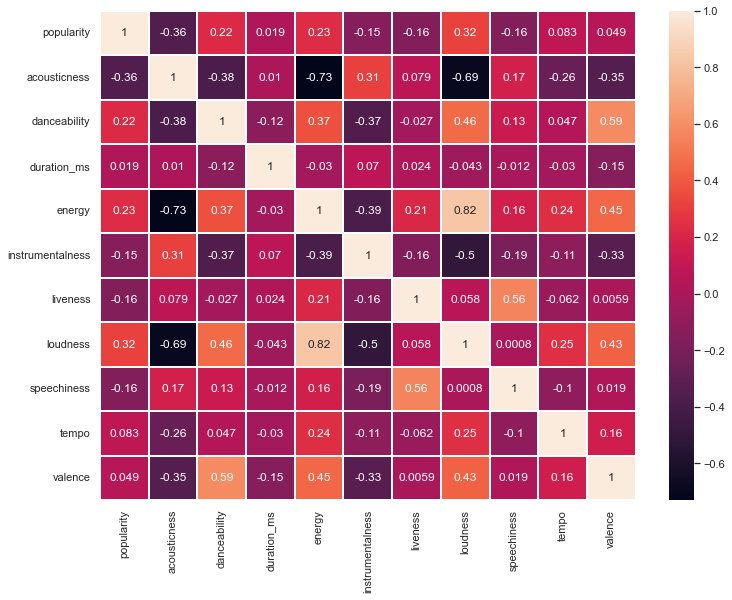

In [8]:
df = df.drop_duplicates(subset=['track_id'])
numeric=df.select_dtypes(exclude=['object'])
correlation_mtrx=numeric.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_mtrx, annot=True, linewidths=0.1)

In [9]:
#features = ["popularity", "acousticness"]
#df[features].hist(figsize=(10, 4), bins=30);
#sns.lineplot(x="acousticness", y="popularity", data=df[features])

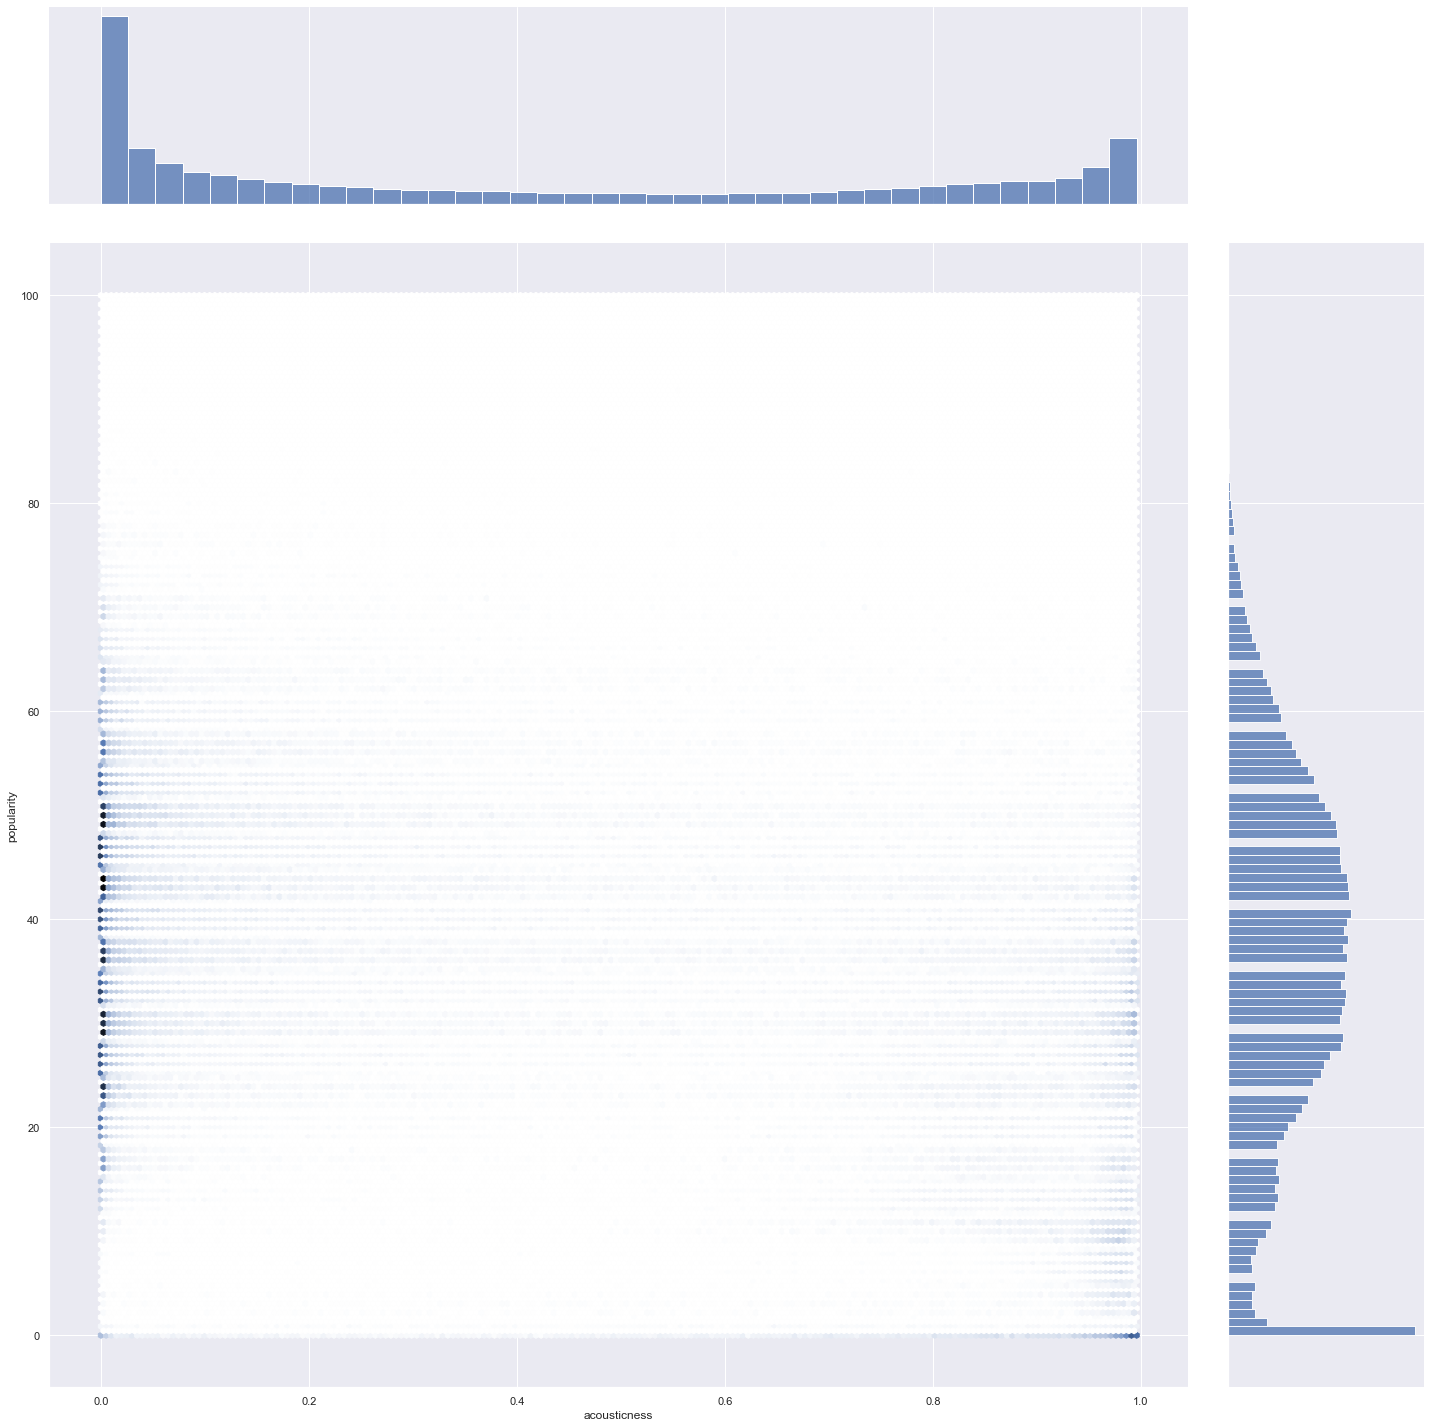

In [10]:
sns.jointplot(data=df[["popularity", "acousticness"]], x="acousticness", y="popularity", height=20,kind="hex", gridsize=200)

#### As we can see, acoustiness badly affects popularity of track. I have used hex kind of jointplot because usual points in usual kind of jointplot are too densed.

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

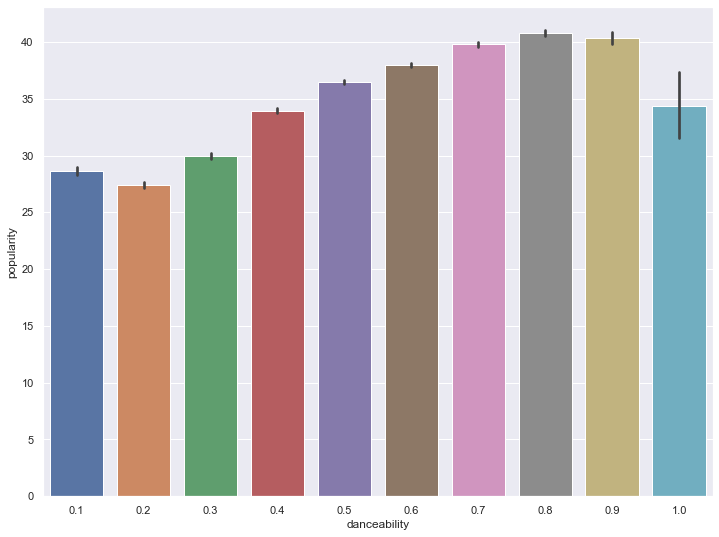

In [11]:
df_danceability=np.round(df[["danceability", "popularity"]], 1)
sns.barplot(x="danceability", y="popularity", data=df_danceability)

#### Based on this graph, you can see that danceability affects the popularity of songs. The higher the danceability, the more people on average will listen to this song.

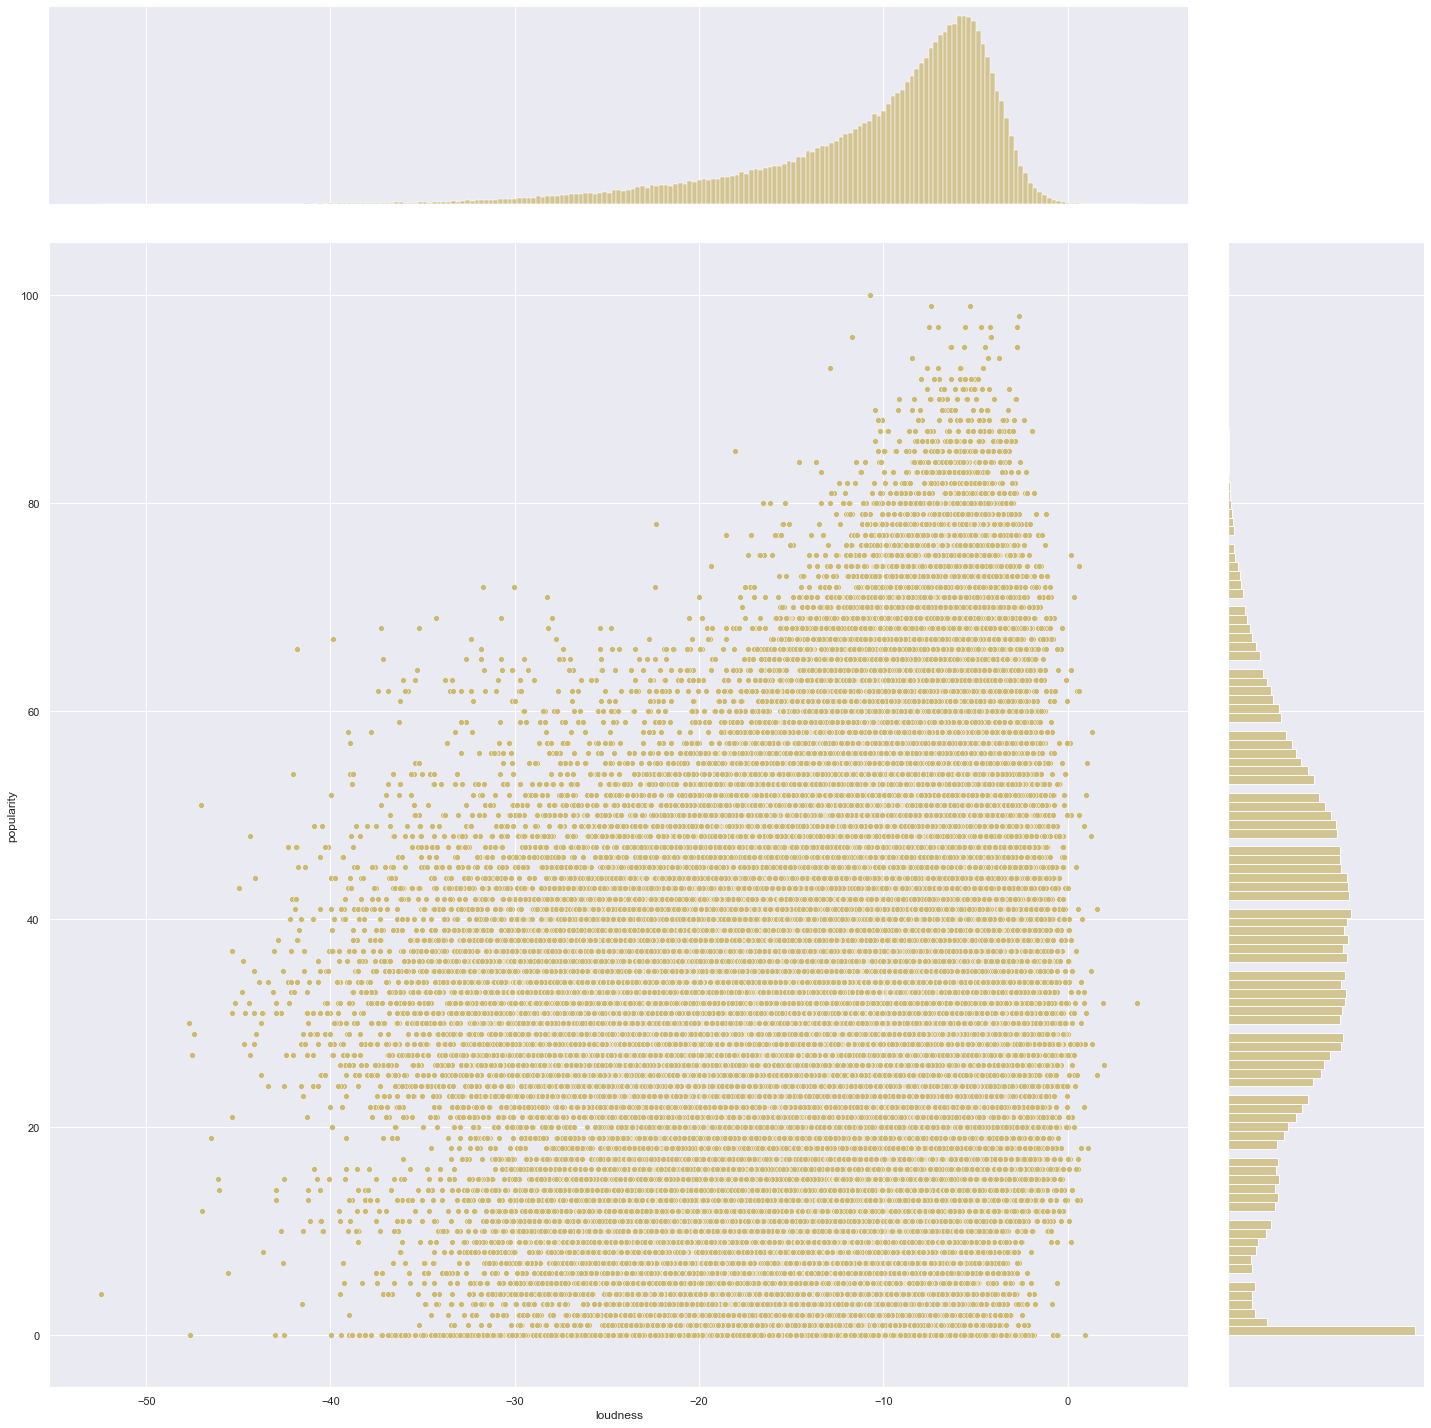

In [12]:
features = ["popularity", "loudness"]
sns.jointplot(data=df[features], x="loudness", y="popularity", height=20, color='y', dropna=True)

sds

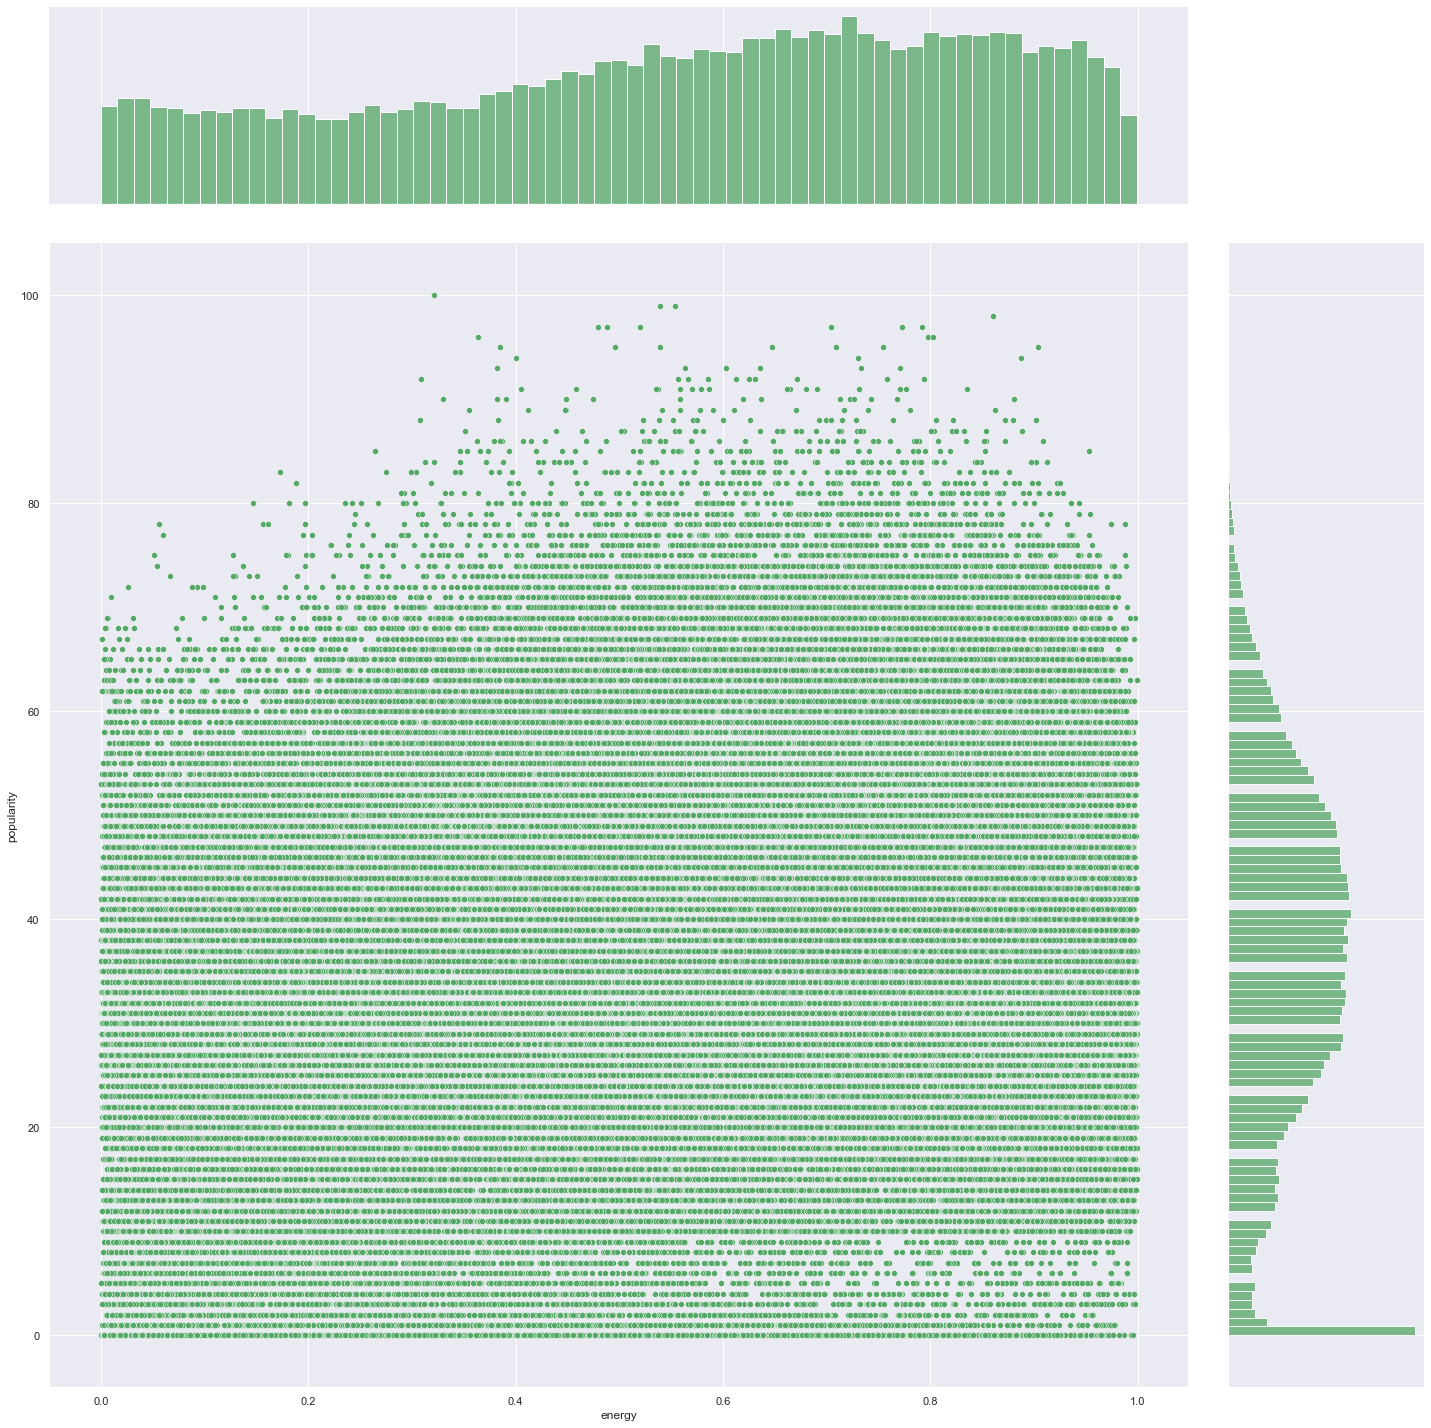

In [13]:
features = ["popularity", "energy"]
sns.jointplot(data=df[features], x="energy", y="popularity", height=20, color='g')

<AxesSubplot:>

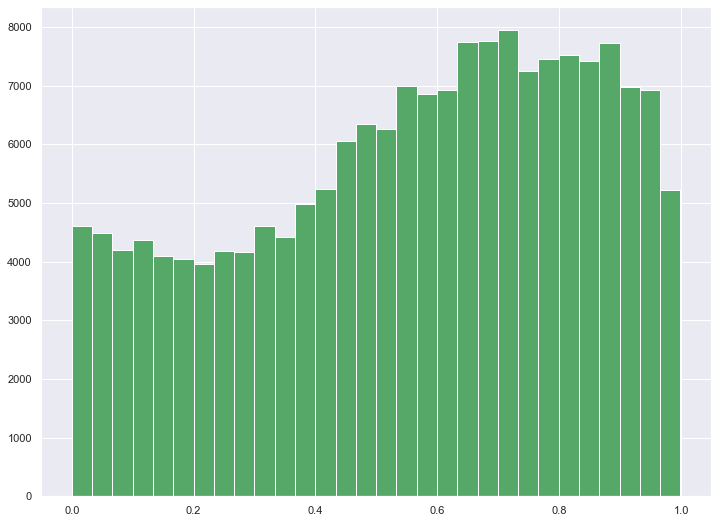

In [14]:
df["energy"].hist(bins=30, color='g')

<AxesSubplot:xlabel='energy', ylabel='popularity'>

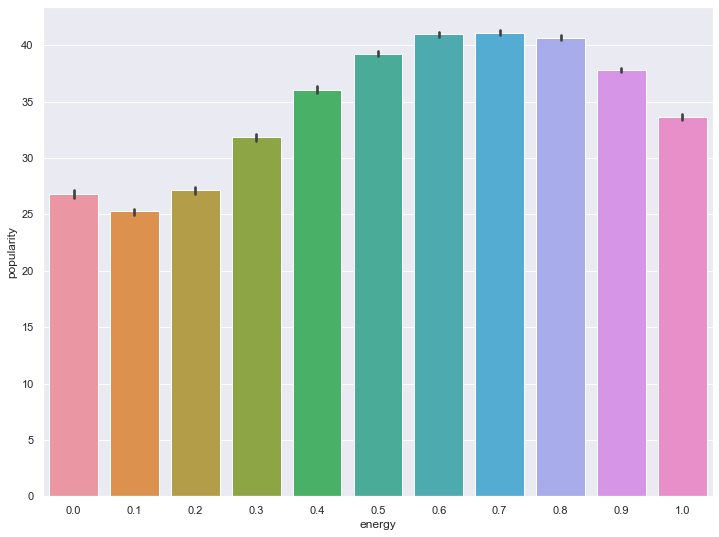

In [15]:
df_energy=np.round(df[["energy", "popularity"]], 1)
sns.barplot(x="energy", y="popularity", data=df_energy)

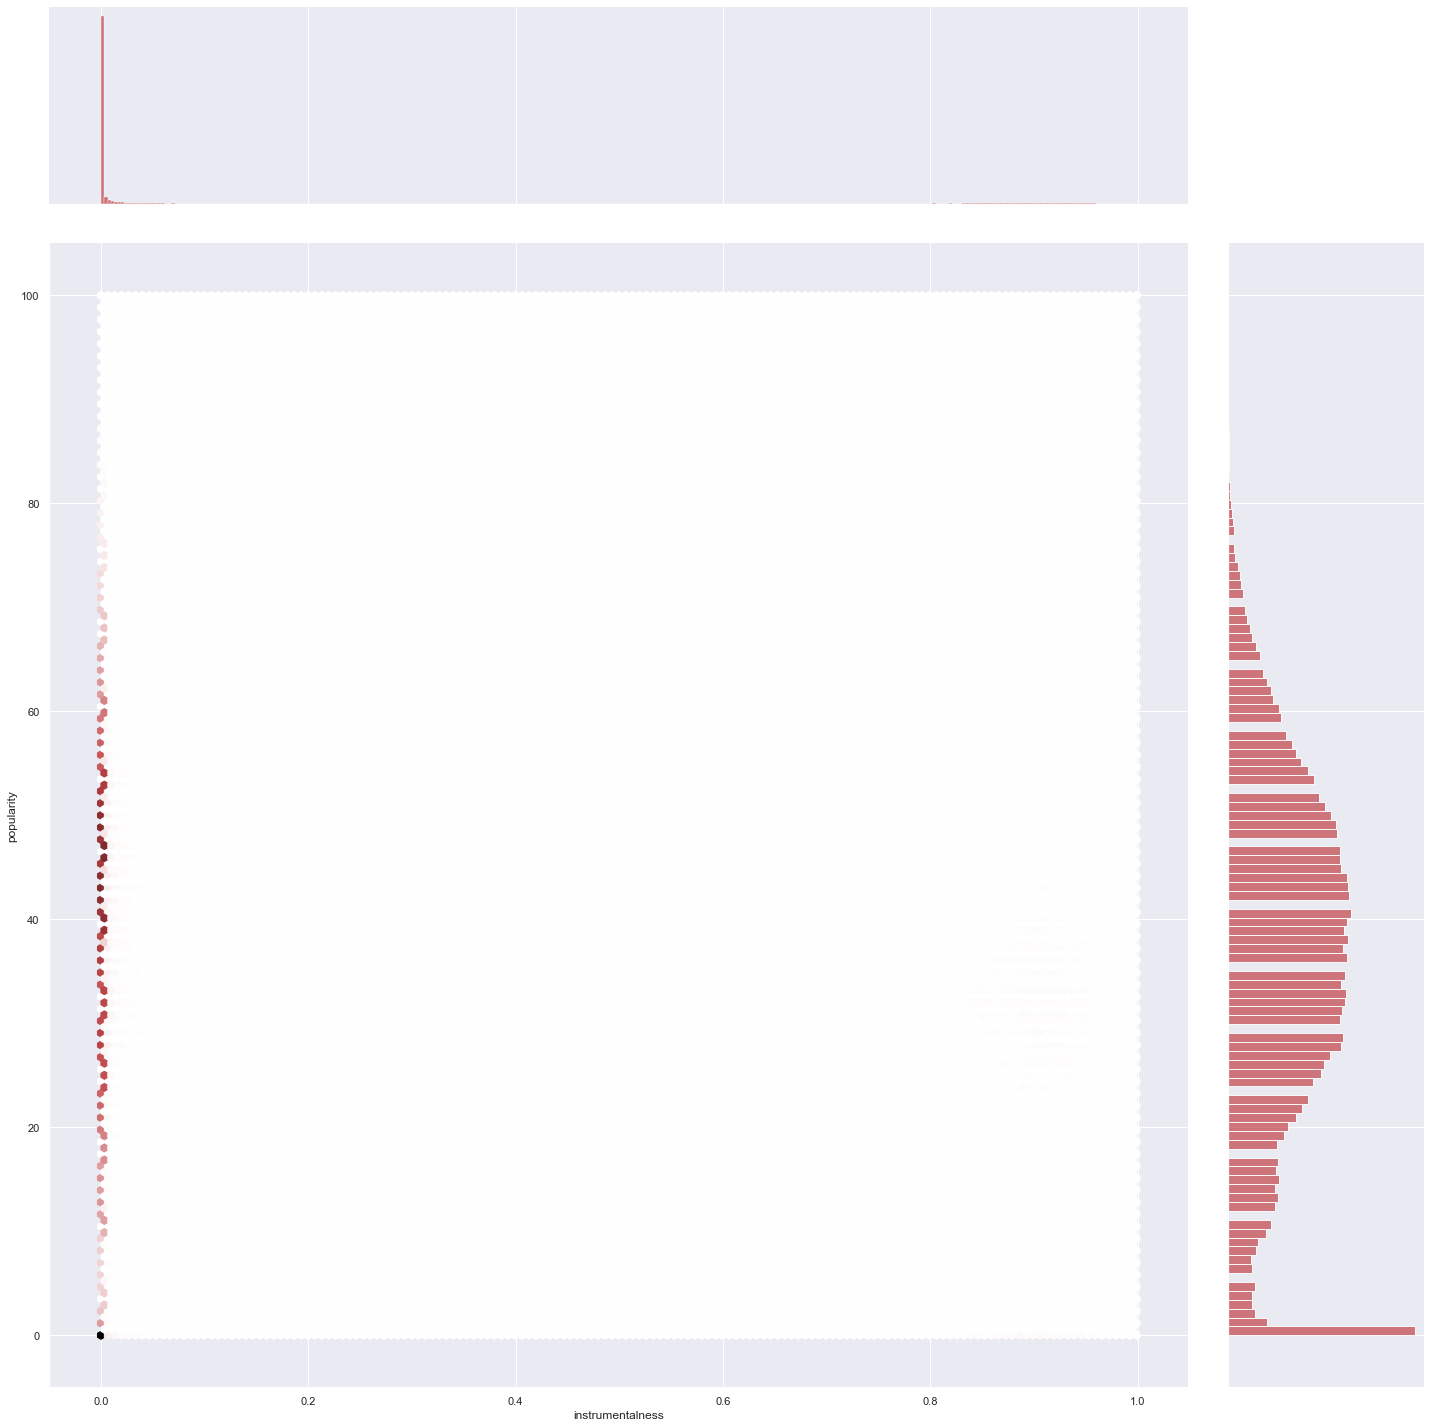

In [16]:
features = ["popularity", "instrumentalness"]
sns.jointplot(data=df[features], x="instrumentalness", y="popularity", height=20, color='r', kind="hex", gridsize=150)

<AxesSubplot:>

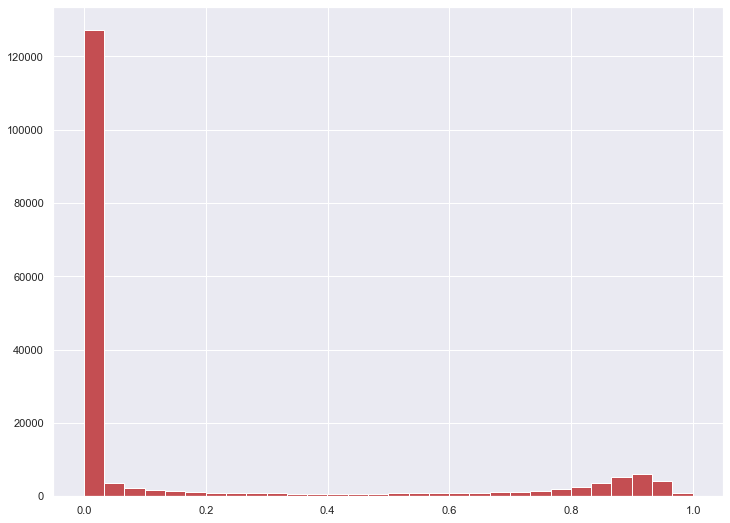

In [17]:
df["instrumentalness"].hist(bins=30, color='r')

<AxesSubplot:xlabel='instrumentalness', ylabel='popularity'>

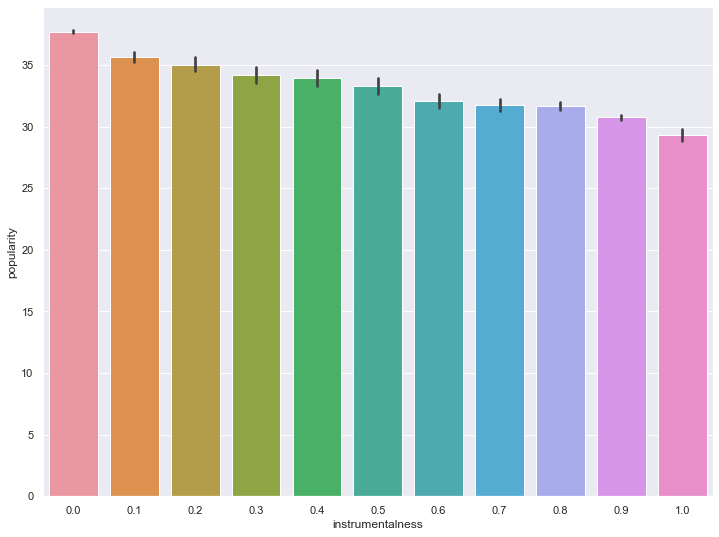

In [18]:
df_instrumentalness=np.round(df[["instrumentalness", "popularity"]], 1)
sns.barplot(x="instrumentalness", y="popularity", data=df_instrumentalness)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

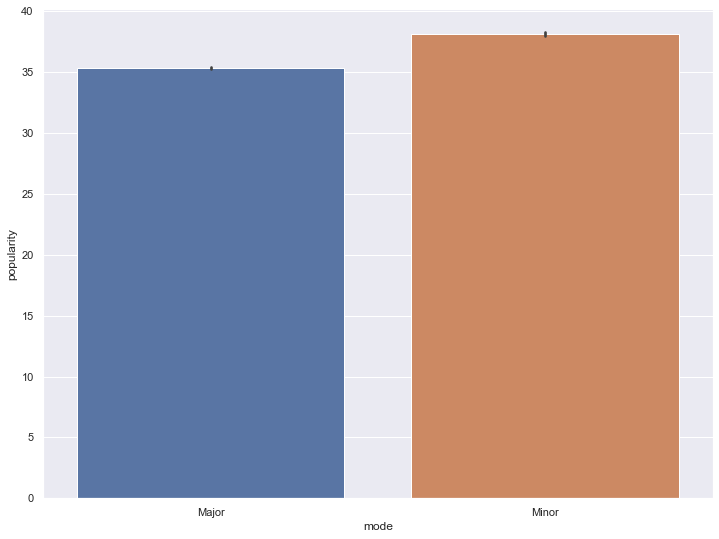

In [19]:
sns.barplot(x='mode', y='popularity', data=df)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

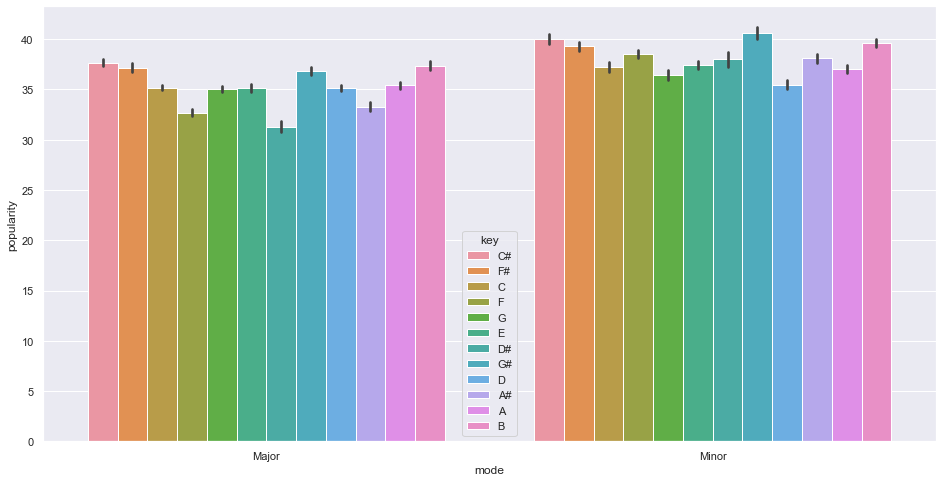

In [20]:
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(x='mode', y='popularity', hue='key', data=df)

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

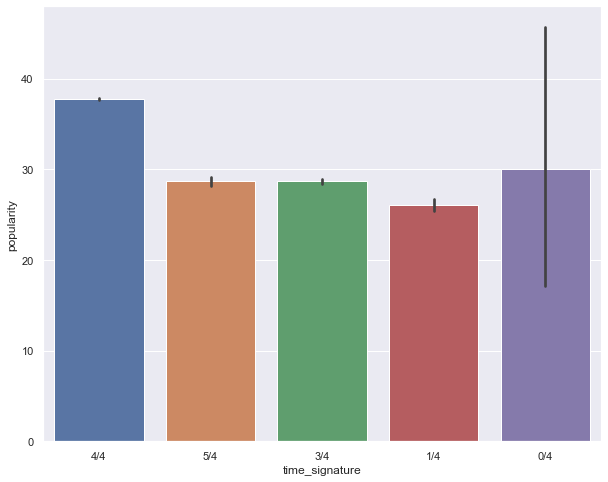

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="time_signature", y="popularity", data=df)

<AxesSubplot:>

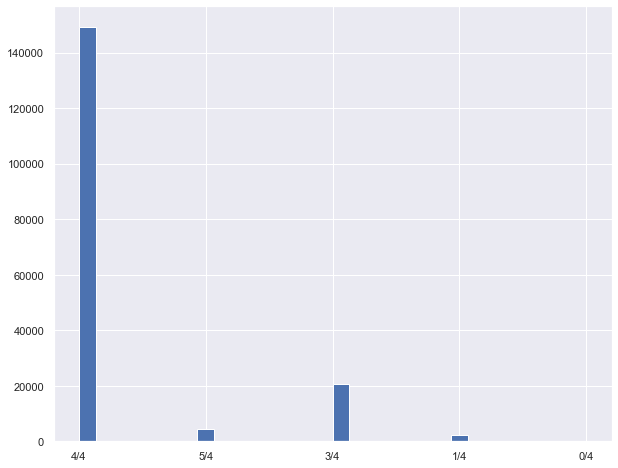

In [22]:
df["time_signature"].hist(bins=30)

#### Can't really say anything about popularity depending on time signature because almost all songs have 4/4 time signature. But I'm still going to include this feature.

#### Now we ready to encode some object features that affect popularity. Will start from keys.

In [23]:

keys = track_id_df["key"].unique()
for k in range(len(keys)):
    track_id_df.loc[track_id_df["key"]==keys[k], "key"] = k
track_id_df.sample(5)    

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children’s Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4rcxTmO8eSHicm2XMoCryJ,Giacomo Puccini,Tosca Fantasy,6,0.97700,0.190,500893,0.133,0.782000,3,0.101,-18.900,Minor,0.0425,101.063,3/4,0.0393,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4dXaWsWZ5Wf4rKYKlojydw,Mad Caddies,Tired Bones,34,0.00588,0.370,172480,0.932,0.000011,3,0.357,-4.252,Minor,0.0531,163.811,4/4,0.9020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7zuTa3BBkprZbH5upY48J8,Big Thief,Watering,46,0.19900,0.633,202067,0.421,0.026600,4,0.115,-9.349,Minor,0.0292,105.801,4/4,0.2060,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4oaU0fMSg3n9kqOwmLPVhH,Set It Off,Partners in Crime (feat. Ash Costello),63,0.00704,0.376,211027,0.939,0.000000,0,0.116,-3.437,Major,0.0572,190.109,4/4,0.8150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3PMiKWiEWDgMlfrCjDgjB3,Giuseppe Verdi,Rigoletto / Act 3: È amabile invero cotal giov...,9,0.96100,0.421,378000,0.209,0.000016,10,0.121,-17.003,Minor,0.2510,97.409,4/4,0.1270,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# encode mode
track_id_df.loc[track_id_df["mode"]=="Minor", "mode"] = 0
track_id_df.loc[track_id_df["mode"]=="Major", "mode"] = 1

#encode time signature
signatures = track_id_df["time_signature"].unique()
for s in range(len(signatures)):
    track_id_df.loc[track_id_df["time_signature"] == signatures[s], "time_signature"] = s        
track_id_df.sample(5)

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children’s Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3nrX6O6rCere5SZRyoxGs1,Jeff Lorber Fusion,Sport Coat Makes Good,40,0.14700,0.786,278960,0.760,0.694000,2,0.3310,-7.979,1,0.0773,93.046,0,0.861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
77dFwwa8XrsZZMBGnAalIc,Night Beats,Shot Down,31,0.58300,0.497,133419,0.803,0.033600,3,0.0827,-9.242,1,0.0730,148.034,0,0.866,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
09o4RmGrRNrrvjWT0uAaKA,Big Gigantic,Thinking out Loud,23,0.00432,0.408,301009,0.815,0.000090,3,0.5310,-5.887,0,0.4610,179.517,0,0.398,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1bb6bROP3OXMHcPw84MtmN,Lil' Kim,Crush on You,61,0.27800,0.827,275640,0.635,0.000119,11,0.1090,-6.770,0,0.2510,88.870,0,0.766,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0WfIxPOaRIDCtDWCmJushk,Lady Gaga,"Eh, Eh (Nothing Else I Can Say)",48,0.26200,0.664,175360,0.874,0.000430,0,0.0863,-3.506,0,0.0653,187.792,0,0.850,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Let's try some models to find out how effecient they are in our case.


In [36]:
y=track_id_df.popularity


X=track_id_df.loc[:, ~track_id_df.columns.isin(["artist_name", "track_name", "duration_ms", "popularity", "tempo", "valence"])]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



In [54]:
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds), model.score(X_t, y_t), model.score(X_v, y_v)
    #return str(accuracy_score(y_v, preds))

LR_model = LinearRegression()
print("LR_model MAE, training score and prediction score:", score_model(LR_model))

#KNR_model = KNeighborsRegressor()
#print("KNR_model MAE and score:", score_model(KNR_model) )

#KNC_model = KNeighborsClassifier()
#print("KNC_model MAE and score:", score_model(KNC_model))

DTC_model = DecisionTreeClassifier()
print("DTC_model MAE and score:", score_model(DTC_model))

DTR_model = DecisionTreeRegressor()
print("DTR_model MAE and score:", score_model(DTR_model))

LR_model = LogisticRegression(max_iter=400)
print("LR_model MAE and score:", score_model(LR_model))

LR_model MAE, training score and prediction score: (7.704667070716912, 0.6473582427089739, 0.6428381099578129)
DTC_model MAE and score: (9.901767783906095, 0.9978715731266662, 0.05218498090793382)
DTR_model MAE and score: (10.22448969971244, 0.9988929236559386, 0.3458813042785942)


c:\users\dforgeek\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_model MAE and score: (8.93268278885589, 0.08263387522185844, 0.07724508556074106)


Let's try to make results better by finding better parameters for DTR model.

In [46]:
DTR_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":[1.0],
           "max_leaf_nodes":[None,10,20,30,40] }
grid_DTR = GridSearchCV(DTR_model, parameters, cv=3)
grid_DTR.fit(X_train, y_train)
print("Model 1 MAE with best paparms:", grid_DTR.best_params_)